In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from Main_Function import fun_vor_main

In [23]:
def cocircular_points(n=8, r=0.5, center=(0.5, 0.5), eps=0.0, seed=None):
    """
    Generate n points equally spaced on a circle (degenerate Voronoi).
    Optional jitter eps breaks exact degeneracy slightly.
    """
    rng = np.random.default_rng(seed)
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    pts = np.c_[center[0] + r * np.cos(angles),
                center[1] + r * np.sin(angles)]
    if eps > 0:
        pts += rng.normal(scale=eps, size=pts.shape)
    return pts

In [24]:
def lattice_points(nx=10, ny=10, eps=0.0, seed=None):
    """
    Generate a regular lattice of points (degenerate Voronoi).
    Optional jitter eps breaks exact degeneracy slightly.
    """
    rng = np.random.default_rng(seed)
    xs = np.linspace(1, 10, nx)
    ys = np.linspace(1, 10, ny)
    X, Y = np.meshgrid(xs, ys)
    pts = np.c_[X.ravel(), Y.ravel()]
    if eps > 0:
        pts += rng.normal(scale=eps, size=pts.shape)
    return pts

In [25]:
def make_voronoi(points):
    """Build a Voronoi object from given points."""
    return Voronoi(points, qhull_options="QJ")

In [26]:
def plot_voronoi(vor, points, title="Voronoi diagram"):
    """
    Plot a Voronoi diagram and its generating points.
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    # Plot Voronoi edges
    voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=True, line_colors='k')
    # Overlay the seeds
    ax.plot(points[:, 0], points[:, 1], 'ro', markersize=5, label="Seeds")
    ax.set_title(title)
    ax.set_aspect("equal")
    ax.legend()
    plt.show()


cell_centers:
 [[5.68422203 3.60473525]
 [1.75793562 6.12445733]
 [4.24668156 0.94483418]
 [4.67692514 6.52531694]
 [7.23282378 6.69508405]
 [7.02447582 8.5742063 ]
 [2.8212447  6.0456439 ]
 [5.45997938 8.20925718]
 [6.67821978 7.81118366]]
vertices:
 [[3.25140029e+00 3.24951254e+00]
 [7.74974328e+00 3.24947843e+00]
 [7.74933334e+00 7.75086969e+00]
 [3.24977039e+00 3.25114263e+00]
 [3.24977155e+00 7.75030889e+00]
 [3.25005725e+00 7.75002319e+00]
 [2.28066362e+04 7.69287224e+00]
 [7.75032282e+00 3.25005806e+00]
 [7.75007021e+00 7.75013278e+00]
 [3.25010142e+00 4.98696843e-01]
 [4.99263546e-01 3.25060318e+00]
 [4.99263546e-01 6.00198354e+00]
 [7.75081260e+00 4.98696843e-01]
 [1.05009054e+01 3.24945757e+00]
 [1.05009054e+01 6.00106422e+00]
 [1.05009054e+01 3.25059406e+00]
 [1.05009054e+01 5.50012510e+00]
 [3.25023263e+00 1.05005988e+01]
 [4.99263546e-01 7.75018693e+00]
 [4.99504275e-01 1.05005988e+01]
 [7.74991582e+00 1.05005988e+01]
 [1.05009054e+01 7.75138738e+00]
 [4.99976414e+00 1.050

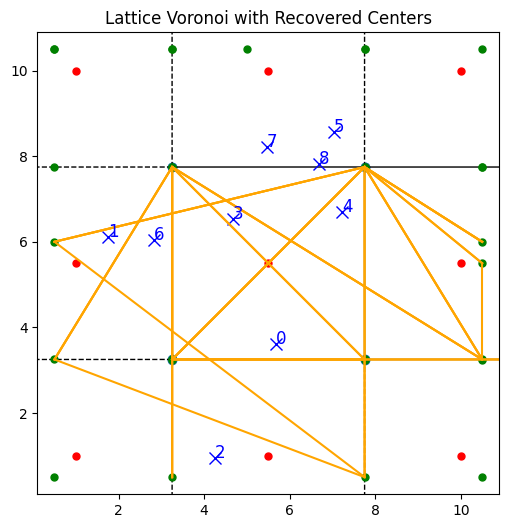

In [29]:
# pts_circ = cocircular_points(n=12, r=0.4, seed=0, eps=0.0)
# vor= make_voronoi(pts_circ)
# plot_voronoi(vor, pts_circ, title="Degenerate Voronoi (Cocircular)")

# Perfect lattice seeds
pts_lat = lattice_points(nx=3, ny=3, eps=1e-3, seed=1)
vor_lat = Voronoi(pts_lat, qhull_options="Qc")
# vor_lat = Voronoi(pts_lat)
# plot_voronoi(vor_lat, pts_lat, title="Degenerate Voronoi (Lattice)")

# from Generate_explicit_Voronoi import ExplicitVoronoi
# explicit_voronoi ,vertices = ExplicitVoronoi(vor_lat)


from Main_Function_lattice import Main_Inverse_Voronoi_Lattice
explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = Main_Inverse_Voronoi_Lattice(vor_lat,pts_lat)
print('cell_centers:\n', cell_centers)

fig1, ax1 = plt.subplots(figsize=(6, 6))
voronoi_plot_2d(vor_lat, ax=ax1, show_points=False, show_vertices=True, line_colors='k')
ax1.plot(pts_lat[:, 0], pts_lat[:, 1], 'ro', markersize=5, label="Seeds")
ax1.plot(cell_centers[:, 0], cell_centers[:, 1], 'bx', markersize=8, label="Recovered Centers")
ax1.set_title("Lattice Voronoi with Recovered Centers")
ax1.set_aspect("equal")

print('vertices:\n', vertices)
# plot vertices and plot the indexes of the vertices
# for i, vert in enumerate(vertices):
#     ax1.text(vert[0], vert[1], str(i), color='purple', fontsize=12)
ax1.plot(vertices[:, 0], vertices[:, 1], 'g.', markersize=10, label="Vertices")

for key in explicit_voronoi.keys():
    print(explicit_voronoi[key])
    cell_edges = np.array(explicit_voronoi[key]['edges'])
    seed_number = explicit_voronoi[key]['seed number']
    print('seed_number:', seed_number)
    ax1.text(cell_centers[seed_number][0], cell_centers[seed_number][1], str(seed_number), color='blue', fontsize=12)
    for edge in cell_edges:
        pt1 = vertices[edge[0]]
        pt2 = vertices[edge[1]]
        ax1.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'orange')


for key in explicit_voronoi.keys():
    print(explicit_voronoi[key])


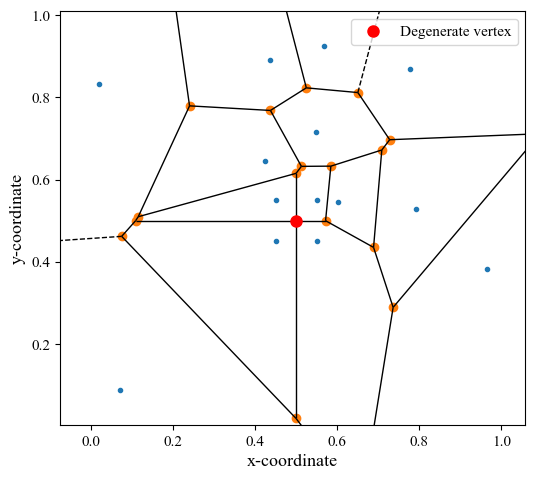

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# 1. Random background points
np.random.seed(0)
random_points = np.random.rand(10, 2)  # 20 points in [0,1]x[0,1]

# # 2. Add 4 points forming a square (centered at 0.5,0.5)
square_points = np.array([
    [0.45, 0.45],
    [0.55, 0.45],
    [0.45, 0.55],
    [0.55, 0.55]
])

# 3. Combine
# points = random_points
points = np.vstack([random_points, square_points])

# 4. Voronoi diagram
vor = Voronoi(points, qhull_options="Qbb Qc Qx")

plt.rcParams.update({
    "font.family": "Times New Roman",   # journal style font
    "font.size": 12,                    # base font size
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "lines.linewidth": 1.2              # slightly thicker lines
})

# 5. Plot
fig, ax = plt.subplots(figsize=(6,6))
voronoi_plot_2d(vor, ax=ax, show_points=True, show_vertices=True, line_colors='k')

# plot the index of vertices
# for idx, vertex in enumerate(vor.vertices):
#     ax.text(vertex[0], vertex[1], str(idx), color='blue', fontsize=8)
# Highlight the special degenerate vertex (the square’s center)
degenerate_vertex = np.array([0.5, 0.5])
ax.plot(*degenerate_vertex, 'ro', markersize=8, label="Degenerate vertex")

ax.set_aspect("equal")
ax.set_xlabel("x-coordinate")
ax.set_ylabel("y-coordinate")
ax.legend(frameon=False)  # no box around legend
# ax.grid(True, linestyle="--", alpha=0.5)
# ax.set_title("Voronoi tessellation with one degenerate vertex")
ax.legend()
plt.savefig('voronoi_with_one_degenerate_vertex.png', dpi=600, bbox_inches=None)
plt.show()



c:\Users\user\OneDrive\PHD\Repositories\Inverse_Voronoi\degeneracy\mirror.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  m = (y2 - y1) / (x2 - x1)
c:\Users\user\OneDrive\PHD\Repositories\Inverse_Voronoi\degeneracy\mirror.py:19: RuntimeWarning: invalid value encountered in scalar add
  distance = abs(m*x - y + c) / (m**2 + 1)**(0.5)


            Converged after 170 iterations
cell_centers:
 [[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]
 [0.45       0.45      ]
 [0.55       0.45      ]
 [0.45       0.55      ]
 [0.55       0.55      ]]
points:
 [[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]
 [0.45       0.45      ]
 [0.55       0.45      ]
 [0.45       0.55      ]
 [0.55       0.55      ]]


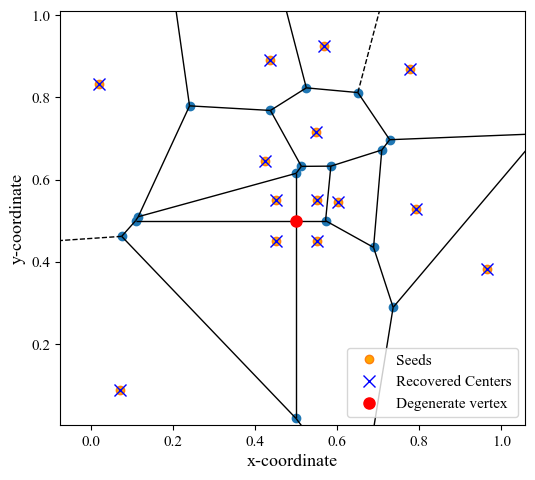

In [9]:
from Main_Function import fun_vor_main
explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor,points)

print('cell_centers:\n', cell_centers)
print('points:\n', points)

plt.rcParams.update({
    "font.family": "Times New Roman",   # journal style font
    "font.size": 12,                    # base font size
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "lines.linewidth": 1.2              # slightly thicker lines
})
fig, ax = plt.subplots(figsize=(6, 6))
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=True, line_colors='k')
ax.plot(points[:, 0], points[:, 1], 'o', markersize=6,
        markerfacecolor='orange', label="Seeds")
ax.plot(cell_centers[:, 0], cell_centers[:, 1], 'bx', markersize=8, label="Recovered Centers")

degenerate_vertex = np.array([0.5, 0.5])
ax.plot(*degenerate_vertex, 'ro', markersize=8, label="Degenerate vertex")

ax.set_aspect("equal")
ax.set_xlabel("x-coordinate")
ax.set_ylabel("y-coordinate")
ax.legend(frameon=False)  # no box around legend
# ax.grid(True, linestyle="--", alpha=0.5)
# ax.set_title("Voronoi tessellation with one degenerate vertex")
ax.legend()
plt.savefig('voronoi_with_one_degenerate_vertex.png', dpi=600, bbox_inches=None)
plt.show()


            Converged after 124 iterations


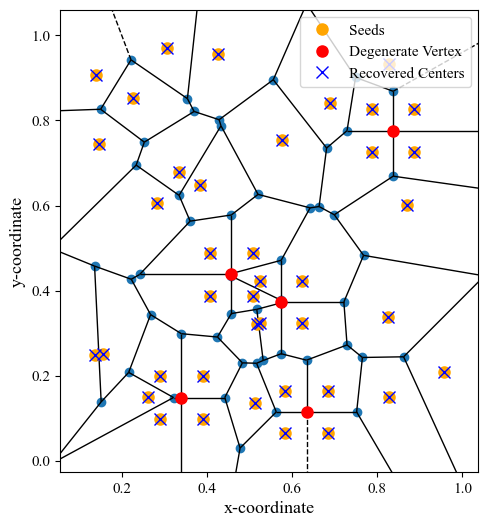

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def generate_degenerate_tessellation(num_random=20, num_degenerate=3, delta=0.05, seed=0):
    """
    Generate a Voronoi tessellation with a specified number of degenerate vertices.
    Each degenerate vertex is created by placing 4 points in a small square cluster.

    Parameters
    ----------
    num_random : int
        Number of random background points.
    num_degenerate : int
        Number of degenerate vertices to create.
    delta : float
        Half-side length of each square cluster (controls degeneracy strength).
    seed : int
        Random seed for reproducibility.

    Returns
    -------
    vor : scipy.spatial.Voronoi
        Voronoi tessellation object.
    points : ndarray, shape (N, 2)
        All generating seed points (random + degenerate).
    degenerate_vertices : ndarray, shape (num_degenerate, 2)
        Locations of the intended degenerate vertices (square centers).
    """
    rng = np.random.default_rng(seed)

    # 1. Random background points
    random_points = rng.random((num_random, 2))

    # 2. Create degenerate clusters
    degenerate_vertices = rng.random((num_degenerate, 2))  # cluster centers
    square_points_all = []

    for cx, cy in degenerate_vertices:
        square = np.array([
            [cx - delta, cy - delta],
            [cx + delta, cy - delta],
            [cx - delta, cy + delta],
            [cx + delta, cy + delta],
        ])
        square_points_all.append(square)

    square_points_all = np.vstack(square_points_all)

    # 3. Combine background + degenerate seeds
    points = np.vstack([random_points, square_points_all])

    # 4. Voronoi diagram
    vor = Voronoi(points, qhull_options="Qbb Qc Qx")

    return vor, points, degenerate_vertices

vor, points, degenerate_points = generate_degenerate_tessellation(num_random=20, num_degenerate=5, seed=10)

plt.rcParams.update({
    "font.family": "Times New Roman",   # journal style font
    "font.size": 12,                    # base font size
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "lines.linewidth": 1.2              # slightly thicker lines
})
fig3, ax3 = plt.subplots(figsize=(6, 6))
voronoi_plot_2d(vor, ax=ax3, show_points=False, show_vertices=True, line_colors='k')
ax3.plot(points[:, 0], points[:, 1], 'o', color='orange', markersize=8, label="Seeds")
ax3.plot(degenerate_points[:, 0], degenerate_points[:, 1], 'ro', markersize=8, label="Degenerate Vertex")

explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor,points)

ax3.plot(cell_centers[:, 0], cell_centers[:, 1], 'bx', markersize=8, label="Recovered Centers")


ax3.set_aspect("equal")
ax3.set_xlabel("x-coordinate")
ax3.set_ylabel("y-coordinate")
ax3.legend(frameon=False)  # no box around legend
# ax.grid(True, linestyle="--", alpha=0.5)
# ax.set_title("Voronoi tessellation with one degenerate vertex")
ax3.legend()
plt.savefig('voronoi_with_multiple_degenerate_vertex.png', dpi=600, bbox_inches=None)
plt.show()

Vertex degrees of target cell: []
All vertices degenerate (>=4)? False


c:\Users\user\OneDrive\PHD\Repositories\Inverse_Voronoi\degeneracy\mirror.py:19: RuntimeWarning: invalid value encountered in scalar divide
  distance = abs(m*x - y + c) / (m**2 + 1)**(0.5)


            Converged after 239 iterations
explicit_voronoi:
 {'sub_dict_0': {'seed number': 0, 'seed coordinates': [-0.25, -0.25], 'neighbors': [1, 3, 6], 'edges': [[20, 0], [0, 21], [22, 1], [20, 0], [21, 0]], 'cell vertices': [0, 1, 20, 21, 22]}, 'sub_dict_1': {'seed number': 1, 'seed coordinates': [-0.25, 0.5], 'neighbors': [0, 2, 3, 4, 5], 'edges': [[20, 0], [23, 2], [0, 24], [8, 25], [9, 26], [20, 23], [20, 23]], 'cell vertices': [0, 2, 8, 9, 20, 23, 24, 25, 26]}, 'sub_dict_2': {'seed number': 2, 'seed coordinates': [-0.25, 1.25], 'neighbors': [1, 5, 10], 'edges': [[23, 2], [2, 27], [28, 3], [23, 2], [27, 2]], 'cell vertices': [2, 3, 23, 27, 28]}, 'sub_dict_3': {'seed number': 3, 'seed coordinates': [0.27, 0.27], 'neighbors': [0, 1, 4, 6, 7], 'edges': [[0, 21], [0, 24], [8, 29], [1, 30], [10, 31], [21, 0], [24, 0], [21, 0], [24, 0]], 'cell vertices': [0, 1, 8, 10, 21, 24, 29, 30, 31]}, 'sub_dict_4': {'seed number': 4, 'seed coordinates': [0.27, 0.5], 'neighbors': [1, 3, 5, 8], 'e

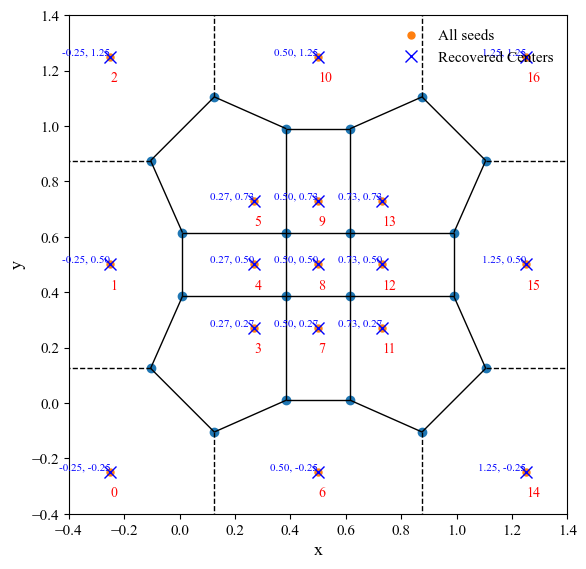

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

import numpy as np
from scipy.spatial import Voronoi

# ============================================================
# 1️⃣  Circumcenter: robust and numerically stable
# ============================================================
def circumcenter(A, B, C, tol=1e-12):
    """
    Compute the circumcenter and radius of triangle (A,B,C) in 2D.
    Returns (center, radius).

    Uses determinant formulation for better numerical stability.
    """
    A = np.asarray(A, dtype=float)
    B = np.asarray(B, dtype=float)
    C = np.asarray(C, dtype=float)

    # Edge vectors
    BA = B - A
    CA = C - A

    # Compute perpendicular bisector intersection
    d = 2.0 * np.cross(BA, CA)
    if abs(d) < tol:
        # Points are almost collinear
        mid_AB = (A + B) / 2
        mid_AC = (A + C) / 2
        center = (mid_AB + mid_AC) / 2
        R = np.linalg.norm(center - A)
        return center, R

    # Squared lengths
    a2 = np.dot(A, A)
    b2 = np.dot(B, B)
    c2 = np.dot(C, C)

    ux = (a2 * (B[1] - C[1]) + b2 * (C[1] - A[1]) + c2 * (A[1] - B[1])) / d
    uy = (a2 * (C[0] - B[0]) + b2 * (A[0] - C[0]) + c2 * (B[0] - A[0])) / d
    center = np.array([ux, uy])
    R = np.linalg.norm(center - A)
    return center, R


# ============================================================
# 2️⃣  Build fully-degenerate Voronoi cell system
# ============================================================
def build_fully_degenerate_cell(m=6, radius=0.25, seed_center=(0.5, 0.5),
                                frame_margin=0.25, domain=(0, 1, 0, 1)):
    """
    Construct a Voronoi diagram where the target cell's every vertex is degenerate.

    Parameters
    ----------
    m : int
        Number of neighboring seeds around the central one (>=4 recommended).
    radius : float
        Distance from center to the neighboring seeds.
    seed_center : tuple(float, float)
        Coordinates of the central (target) seed.
    frame_margin : float
        Distance of outer frame points from the domain boundary.
    domain : (xmin, xmax, ymin, ymax)
        Bounding box defining the visible domain.

    Returns
    -------
    vor : scipy.spatial.Voronoi
    points : ndarray (N,2)
        All generated seeds (central + ring + degenerate + frame).
    target_idx : int
        Index of the target (central) seed.
    """
    O = np.array(seed_center, dtype=float)

    # 1️⃣ Neighbors on a circle
    angles = np.linspace(0, 2 * np.pi, m, endpoint=False)
    neighbors = np.column_stack([
        O[0] + radius * np.cos(angles),
        O[1] + radius * np.sin(angles)
    ])

    # 2️⃣ Generate "degenerate" concyclic points
    D_list = []
    for i in range(m):
        A, B, C = O, neighbors[i], neighbors[(i + 1) % m]
        center, _ = circumcenter(A, B, C)
        D = 2 * center - A   # opposite of A wrt circumcenter
        D_list.append(D)
    D = np.vstack(D_list)

    # 3️⃣ Bounding frame points outside the visible domain
    xmin, xmax, ymin, ymax = domain
    f = frame_margin
    frame_pts = np.array([
        [xmin - f, ymin - f], [0.5 * (xmin + xmax), ymin - f], [xmax + f, ymin - f],
        [xmin - f, 0.5 * (ymin + ymax)],                      [xmax + f, 0.5 * (ymin + ymax)],
        [xmin - f, ymax + f], [0.5 * (xmin + xmax), ymax + f], [xmax + f, ymax + f]
    ])

    # 4️⃣ Combine everything and remove near-duplicates
    points = np.vstack([O[None, :], neighbors, D, frame_pts])
    points = np.unique(np.round(points, 12), axis=0)  # remove exact/near duplicates

    # 5️⃣ Build Voronoi diagram
    vor = Voronoi(points, qhull_options="Qbb Qc Qx Qz")

    return vor, points, 0  # central seed index is 0


# ============================================================
# 3️⃣  Vertex degree diagnostics
# ============================================================
def region_vertex_degrees(vor, point_index):
    """
    Compute vertex degrees (number of ridges meeting) for a given seed’s region.
    Returns (degree_list, all_vertices_deg4_flag).
    """
    region_index = vor.point_region[point_index]
    if region_index == -1:
        return [], False

    region = vor.regions[region_index]
    if not region or -1 in region:
        return [], False

    # Count how many ridges use each vertex
    vertex_degree = np.zeros(len(vor.vertices), dtype=int)
    for (p, q), verts in zip(vor.ridge_points, vor.ridge_vertices):
        if -1 in verts:
            continue
        for v in verts:
            vertex_degree[v] += 1

    degs = [vertex_degree[v] for v in region if v != -1]
    all_deg4 = (len(degs) > 0 and all(d >= 4 for d in degs))
    return degs, all_deg4




m = 4            # hexagonal target cell
radius = 0.23    # keep comfortably inside [0,1]^2
vor, pts, target_idx = build_fully_degenerate_cell(m=m, radius=radius)



# Verify degeneracy (all vertices of target region should have degree >= 4)
degs, ok = region_vertex_degrees(vor, target_idx)
print("Vertex degrees of target cell:", degs)
print("All vertices degenerate (>=4)?", ok)

# Plot
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 12,
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})
fig, ax = plt.subplots(figsize=(6, 6))
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=True, line_colors='k')

explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor,pts)

print('explicit_voronoi:\n', explicit_voronoi)


# styling points
# O = pts[target_idx]
# m_neighbors = m
# neighbors = pts[1:1+m_neighbors]
# D = pts[1+m_neighbors:1+2*m_neighbors]

ax.plot(vor.points[:,0], vor.points[:,1], 'o', color='tab:orange', ms=5, label="All seeds")
ax.plot(cell_centers[:, 0], cell_centers[:, 1], 'bx', ms=8, label="Recovered Centers")
# print the coordinates of cell_centers
for idx, (x, y) in enumerate(cell_centers):
    # coordinate
    ax.text(x, y, f'{x:.2f}, {y:.2f}', color='blue', fontsize=8, ha='right', va='bottom')
    ax.text(x, y-0.05, f'{idx}', color='red', fontsize=10, ha='left', va='top')

print('cell_centers:\n', cell_centers)
print('points:\n', pts)

print('length of cell_centers:', len(cell_centers))
print('length of pts:', len(vor.points))

# ax.plot(O[0], O[1], 'ro', ms=9, label="Target seed")
# ax.plot(neighbors[:,0], neighbors[:,1], 'bo', ms=6, label="Neighbors on ring")
# ax.plot(D[:,0], D[:,1], 'gx', ms=7, label="Concyclic points (force degeneracy)")

ax.set_aspect('equal')
# ax.set_xlim(-0.05, 1.05)
# ax.set_ylim(-0.05, 1.05)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(frameon=False)
plt.tight_layout()
plt.show()


            Converged after 161 iterations
total_same_vertices:
 [[9, 2], [2, 9], [20, 14], [25, 15], [14, 20], [22, 21], [21, 22], [15, 25], [27, 26], [26, 27]]
unique_same_vertices:
 [[9, 2], [20, 14], [25, 15], [22, 21], [27, 26]]
original_points_rearranged:
 [[-0.25       -0.25      ]
 [-0.25        0.5       ]
 [-0.25        1.25      ]
 [ 0.21570437  0.5       ]
 [ 0.31392609  0.36480939]
 [ 0.31392609  0.63519061]
 [ 0.41214782  0.22961878]
 [ 0.41214782  0.77038122]
 [ 0.5        -0.25      ]
 [ 0.5         0.5       ]
 [ 0.5         1.25      ]
 [ 0.57107391  0.281257  ]
 [ 0.57107391  0.718743  ]
 [ 0.73        0.33289522]
 [ 0.73        0.5       ]
 [ 0.73        0.66710478]
 [ 1.25       -0.25      ]
 [ 1.25        0.5       ]
 [ 1.25        1.25      ]]
cell_centers:
 [[-0.25       -0.25      ]
 [-0.25        0.5       ]
 [-0.25        1.25      ]
 [ 0.21570437  0.5       ]
 [ 0.31392609  0.36480939]
 [ 0.31392609  0.63519061]
 [ 0.41214782  0.22961878]
 [ 0.41214782  0.77

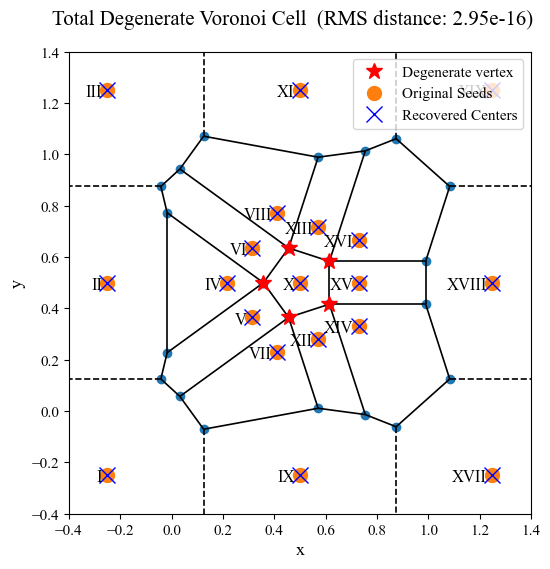

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# ----------------------------------------------------------
# Helper: robust circumcenter
# ----------------------------------------------------------
def circumcenter(A, B, C, tol=1e-12):
    A, B, C = map(np.asarray, (A, B, C))
    d = 2.0 * np.cross(B - A, C - A)
    if abs(d) < tol:
        center = (A + B + C) / 3
        R = np.linalg.norm(center - A)
        return center, R
    a2, b2, c2 = map(lambda P: np.dot(P, P), (A, B, C))
    ux = (a2 * (B[1]-C[1]) + b2 * (C[1]-A[1]) + c2 * (A[1]-B[1])) / d
    uy = (a2 * (C[0]-B[0]) + b2 * (A[0]-C[0]) + c2 * (B[0]-A[0])) / d
    center = np.array([ux, uy])
    R = np.linalg.norm(center - A)
    return center, R

# ----------------------------------------------------------
# Generate 5-sided cell, 4 degenerate vertices
# ----------------------------------------------------------
def build_partially_degenerate_cell(m=5, radius=0.25, seed_center=(0.5, 0.5),
                                    n_degenerate=4, frame_margin=0.25):
    """
    Create a Voronoi diagram whose central cell has `m` sides,
    with `n_degenerate` (≤ m) of its vertices degenerate (degree ≥ 4).
    """
    O = np.array(seed_center, dtype=float)

    # --- Step 1: Regular neighbors around center ---
    angles = np.linspace(0, 2*np.pi, m, endpoint=False)
    neighbors = np.column_stack([
        O[0] + radius * np.cos(angles),
        O[1] + radius * np.sin(angles)
    ])

    # --- Step 2: Add degenerate concyclic points for first n_degenerate sides ---
    D_list = []
    for i in range(n_degenerate):
        A, B, C = O, neighbors[i], neighbors[(i + 1) % m]
        center, _ = circumcenter(A, B, C)
        D = 2 * center - A     # diametrically opposite of O
        D_list.append(D)
    if D_list:
        D = np.vstack(D_list)
    else:
        D = np.empty((0, 2))

    # --- Step 3: Add frame points outside domain (optional but stabilizes Voronoi) ---
    f = frame_margin
    frame_pts = np.array([
        [-f, -f], [0.5, -f], [1 + f, -f],
        [-f, 0.5], [1 + f, 0.5],
        [-f, 1 + f], [0.5, 1 + f], [1 + f, 1 + f]
    ])

    # --- Step 4: Combine and remove duplicates ---
    points = np.vstack([O[None, :], neighbors, D, frame_pts])
    points = np.unique(np.round(points, 12), axis=0)

    vor = Voronoi(points, qhull_options="Qbb Qc Qx Qz")
    return vor, points, 0  # central seed index = 0





# ----------------------------------------------------------
# Run example
# ----------------------------------------------------------
vor, pts, target_idx = build_partially_degenerate_cell(
    m=5,          # pentagonal
    radius=0.23,  # distance from center to ring
    n_degenerate=5
)



plt.rcParams.update({
    "font.family": "Times New Roman",   # journal style font
    "font.size": 12,                    # base font size
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "lines.linewidth": 5              # slightly thicker lines
})

fig, ax = plt.subplots(figsize=(6,6))
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=True, line_colors='k',line_width=1.2)


from Main_Function import fun_vor_main
explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor,vor.points)

# plot the index of each cell from explicit_voronoi
# for i, items in enumerate(explicit_voronoi):
#     ax.text(cell_centers[i, 0], cell_centers[i, 1], str(i), color='red', fontsize=10, ha='left', va='top')

# plot the index of vertices from vertices
# for idx, vertex in enumerate(vor.vertices):
#     ax.text(vertex[0], vertex[1], str(idx), color='blue', fontsize=12)




# find the vertices in the vertices object that have the same coordinates
total_same_vertices = []
for i in range(len(vertices)):
    coord1 = vertices[i]
    same_vertices = []
    for j in range(len(vor.vertices)):
        coord2 = vor.vertices[j]
        if i != j:
            if np.allclose(coord1, coord2):
                same_vertices.append(j)
    if same_vertices != []:
        same_vertices.append(i)
        
        total_same_vertices.append(same_vertices)
print('total_same_vertices:\n', total_same_vertices)

# delete the similar arrays in total_same_vertices
unique_same_vertices = []
for item in total_same_vertices:
    elem1 = item[0]
    elem2 = item[1]
    if [elem2, elem1] not in unique_same_vertices:
        unique_same_vertices.append(item)
print('unique_same_vertices:\n', unique_same_vertices)

# calculate the RMS distance between cell_centers and pts

print('original_points_rearranged:\n', pts)
print('cell_centers:\n', cell_centers)

RMS_distance = np.sqrt(np.mean(np.sum((cell_centers - pts)**2, axis=1)))
print('RMS_distance between cell_centers and original points:', RMS_distance)
# log10 the RMS distance
log10_RMS_distance = np.log10(RMS_distance)
print('log10_RMS_distance between cell_centers and original points:', log10_RMS_distance)

# plot the degenerate vertices
degenerate_coords = np.array([
    vor.vertices[item[0]] for item in unique_same_vertices
])
ax.plot(degenerate_coords[:, 0], degenerate_coords[:, 1],
        'r*', markersize=12, label="Degenerate vertex")
ax.plot(pts[:,0], pts[:,1], 'o', color='tab:orange', ms=10, label="Original Seeds")
ax.plot(cell_centers[:, 0], cell_centers[:, 1], 'bx', ms=12, label="Recovered Centers")

# plot cell number in Roman numbers 
for i, center in enumerate(cell_centers):
    roman_numerals = ["I", "II", "III", "IV", "V", "VI", "VII", "VIII", "IX", "X",
                      "XI", "XII", "XIII", "XIV", "XV", "XVI", "XVII", "XVIII", "XIX", "XX"]
    if i < len(roman_numerals):
        ax.text(center[0]-0.02, center[1]+0.02, roman_numerals[i], color='black', fontsize=12, ha='right', va='top')

fig.text(0.5, 0.95, f'Total Degenerate Voronoi Cell  (RMS distance: {RMS_distance:.2e})',
         ha='center', va='top', fontsize=15)
ax.legend()
ax.set_aspect('equal')  
ax.set_xlabel("x")
ax.set_ylabel("y")

# save figure
plt.savefig('Total Degenerate Voronoi cell.png', dpi=600 )








            Converged after 146 iterations
total_same_vertices:
 [[10, 2], [12, 5], [2, 10], [5, 12], [23, 18], [18, 23], [25, 24], [24, 25]]
unique_same_vertices:
 [[10, 2], [12, 5], [23, 18], [25, 24]]
original_points_rearranged:
 [[-0.25       -0.25      ]
 [-0.25        0.5       ]
 [-0.25        1.25      ]
 [ 0.21570437  0.5       ]
 [ 0.31392609  0.36480939]
 [ 0.31392609  0.63519061]
 [ 0.41214782  0.22961878]
 [ 0.41214782  0.77038122]
 [ 0.5        -0.25      ]
 [ 0.5         0.5       ]
 [ 0.5         1.25      ]
 [ 0.57107391  0.281257  ]
 [ 0.57107391  0.718743  ]
 [ 0.73        0.5       ]
 [ 0.73        0.66710478]
 [ 1.25       -0.25      ]
 [ 1.25        0.5       ]
 [ 1.25        1.25      ]]
cell_centers:
 [[-0.25       -0.25      ]
 [-0.25        0.5       ]
 [-0.25        1.25      ]
 [ 0.21570437  0.5       ]
 [ 0.31392609  0.36480939]
 [ 0.31392609  0.63519061]
 [ 0.41214782  0.22961878]
 [ 0.41214782  0.77038122]
 [ 0.5        -0.25      ]
 [ 0.5         0.5    

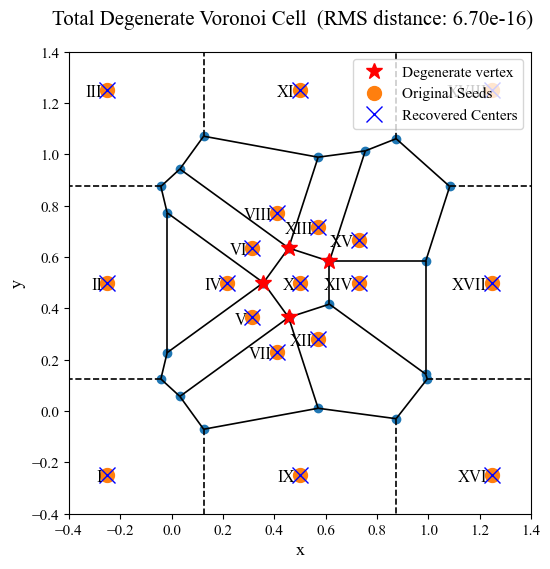

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# ----------------------------------------------------------
# Helper: robust circumcenter
# ----------------------------------------------------------
def circumcenter(A, B, C, tol=1e-12):
    A, B, C = map(np.asarray, (A, B, C))
    d = 2.0 * np.cross(B - A, C - A)
    if abs(d) < tol:
        center = (A + B + C) / 3
        R = np.linalg.norm(center - A)
        return center, R
    a2, b2, c2 = map(lambda P: np.dot(P, P), (A, B, C))
    ux = (a2 * (B[1]-C[1]) + b2 * (C[1]-A[1]) + c2 * (A[1]-B[1])) / d
    uy = (a2 * (C[0]-B[0]) + b2 * (A[0]-C[0]) + c2 * (B[0]-A[0])) / d
    center = np.array([ux, uy])
    R = np.linalg.norm(center - A)
    return center, R

# ----------------------------------------------------------
# Generate 5-sided cell, 4 degenerate vertices
# ----------------------------------------------------------
def build_partially_degenerate_cell(m=5, radius=0.25, seed_center=(0.5, 0.5),
                                    n_degenerate=4, frame_margin=0.25):
    """
    Create a Voronoi diagram whose central cell has `m` sides,
    with `n_degenerate` (≤ m) of its vertices degenerate (degree ≥ 4).
    """
    O = np.array(seed_center, dtype=float)

    # --- Step 1: Regular neighbors around center ---
    angles = np.linspace(0, 2*np.pi, m, endpoint=False)
    neighbors = np.column_stack([
        O[0] + radius * np.cos(angles),
        O[1] + radius * np.sin(angles)
    ])

    # --- Step 2: Add degenerate concyclic points for first n_degenerate sides ---
    D_list = []
    for i in range(n_degenerate):
        A, B, C = O, neighbors[i], neighbors[(i + 1) % m]
        center, _ = circumcenter(A, B, C)
        D = 2 * center - A     # diametrically opposite of O
        D_list.append(D)
    if D_list:
        D = np.vstack(D_list)
    else:
        D = np.empty((0, 2))

    # --- Step 3: Add frame points outside domain (optional but stabilizes Voronoi) ---
    f = frame_margin
    frame_pts = np.array([
        [-f, -f], [0.5, -f], [1 + f, -f],
        [-f, 0.5], [1 + f, 0.5],
        [-f, 1 + f], [0.5, 1 + f], [1 + f, 1 + f]
    ])

    # --- Step 4: Combine and remove duplicates ---
    points = np.vstack([O[None, :], neighbors, D, frame_pts])
    points = np.unique(np.round(points, 12), axis=0)

    vor = Voronoi(points, qhull_options="Qbb Qc Qx Qz")
    return vor, points, 0  # central seed index = 0





# ----------------------------------------------------------
# Run example
# ----------------------------------------------------------
vor, pts, target_idx = build_partially_degenerate_cell(
    m=5,          # pentagonal
    radius=0.23,  # distance from center to ring
    n_degenerate=4
)



plt.rcParams.update({
    "font.family": "Times New Roman",   # journal style font
    "font.size": 12,                    # base font size
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "lines.linewidth": 5              # slightly thicker lines
})

fig, ax = plt.subplots(figsize=(6,6))
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=True, line_colors='k',line_width=1.2)


from Main_Function import fun_vor_main
explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor,vor.points)

# plot the index of each cell from explicit_voronoi
# for i, items in enumerate(explicit_voronoi):
#     ax.text(cell_centers[i, 0], cell_centers[i, 1], str(i), color='red', fontsize=10, ha='left', va='top')

# plot the index of vertices from vertices
# for idx, vertex in enumerate(vor.vertices):
#     ax.text(vertex[0], vertex[1], str(idx), color='blue', fontsize=12)




# find the vertices in the vertices object that have the same coordinates
total_same_vertices = []
for i in range(len(vertices)):
    coord1 = vertices[i]
    same_vertices = []
    for j in range(len(vor.vertices)):
        coord2 = vor.vertices[j]
        if i != j:
            if np.allclose(coord1, coord2):
                same_vertices.append(j)
    if same_vertices != []:
        same_vertices.append(i)
        
        total_same_vertices.append(same_vertices)
print('total_same_vertices:\n', total_same_vertices)

# delete the similar arrays in total_same_vertices
unique_same_vertices = []
for item in total_same_vertices:
    elem1 = item[0]
    elem2 = item[1]
    if [elem2, elem1] not in unique_same_vertices:
        unique_same_vertices.append(item)
print('unique_same_vertices:\n', unique_same_vertices)

# calculate the RMS distance between cell_centers and pts

print('original_points_rearranged:\n', pts)
print('cell_centers:\n', cell_centers)

RMS_distance = np.sqrt(np.mean(np.sum((cell_centers - pts)**2, axis=1)))
print('RMS_distance between cell_centers and original points:', RMS_distance)
# log10 the RMS distance
log10_RMS_distance = np.log10(RMS_distance)
print('log10_RMS_distance between cell_centers and original points:', log10_RMS_distance)

# plot the degenerate vertices
degenerate_coords = np.array([
    vor.vertices[item[0]] for item in unique_same_vertices
])
ax.plot(degenerate_coords[:, 0], degenerate_coords[:, 1],
        'r*', markersize=12, label="Degenerate vertex")
ax.plot(pts[:,0], pts[:,1], 'o', color='tab:orange', ms=10, label="Original Seeds")
ax.plot(cell_centers[:, 0], cell_centers[:, 1], 'bx', ms=12, label="Recovered Centers")

# plot cell number in Roman numbers 
for i, center in enumerate(cell_centers):
    roman_numerals = ["I", "II", "III", "IV", "V", "VI", "VII", "VIII", "IX", "X",
                      "XI", "XII", "XIII", "XIV", "XV", "XVI", "XVII", "XVIII", "XIX", "XX"]
    if i < len(roman_numerals):
        ax.text(center[0]-0.02, center[1]+0.02, roman_numerals[i], color='black', fontsize=12, ha='right', va='top')

fig.text(0.5, 0.95, f'Total Degenerate Voronoi Cell  (RMS distance: {RMS_distance:.2e})',
         ha='center', va='top', fontsize=15)
ax.legend()
ax.set_aspect('equal')  
ax.set_xlabel("x")
ax.set_ylabel("y")
# box around the figure


# save figure
plt.savefig('Partial Degenerate Voronoi cell.png', dpi=600 )








            Converged after 138 iterations
total_same_vertices:
 []
unique_same_vertices:
 []
original_points_rearranged:
 [[-0.25       -0.25      ]
 [-0.25        0.5       ]
 [-0.25        1.25      ]
 [ 0.31392609  0.36480939]
 [ 0.31392609  0.63519061]
 [ 0.5        -0.25      ]
 [ 0.5         0.5       ]
 [ 0.5         1.25      ]
 [ 0.57107391  0.281257  ]
 [ 0.57107391  0.718743  ]
 [ 0.73        0.5       ]
 [ 1.25       -0.25      ]
 [ 1.25        0.5       ]
 [ 1.25        1.25      ]]
cell_centers:
 [[-0.25       -0.25      ]
 [-0.25        0.5       ]
 [-0.25        1.25      ]
 [ 0.31392609  0.36480939]
 [ 0.31392609  0.63519061]
 [ 0.5        -0.25      ]
 [ 0.5         0.5       ]
 [ 0.5         1.25      ]
 [ 0.57107391  0.281257  ]
 [ 0.57107391  0.718743  ]
 [ 0.73        0.5       ]
 [ 1.25       -0.25      ]
 [ 1.25        0.5       ]
 [ 1.25        1.25      ]]
RMS_distance between cell_centers and original points: 3.801312568033341e-16
log10_RMS_distance between 

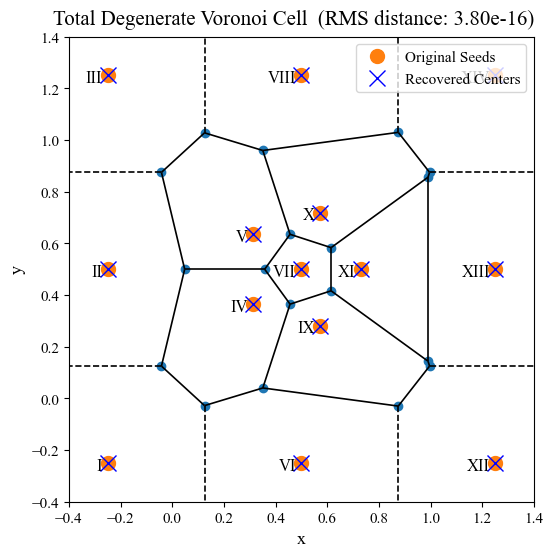

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# ----------------------------------------------------------
# Helper: robust circumcenter
# ----------------------------------------------------------
def circumcenter(A, B, C, tol=1e-12):
    A, B, C = map(np.asarray, (A, B, C))
    d = 2.0 * np.cross(B - A, C - A)
    if abs(d) < tol:
        center = (A + B + C) / 3
        R = np.linalg.norm(center - A)
        return center, R
    a2, b2, c2 = map(lambda P: np.dot(P, P), (A, B, C))
    ux = (a2 * (B[1]-C[1]) + b2 * (C[1]-A[1]) + c2 * (A[1]-B[1])) / d
    uy = (a2 * (C[0]-B[0]) + b2 * (A[0]-C[0]) + c2 * (B[0]-A[0])) / d
    center = np.array([ux, uy])
    R = np.linalg.norm(center - A)
    return center, R

# ----------------------------------------------------------
# Generate 5-sided cell, 4 degenerate vertices
# ----------------------------------------------------------
def build_partially_degenerate_cell(m=5, radius=0.25, seed_center=(0.5, 0.5),
                                    n_degenerate=4, frame_margin=0.25):
    """
    Create a Voronoi diagram whose central cell has `m` sides,
    with `n_degenerate` (≤ m) of its vertices degenerate (degree ≥ 4).
    """
    O = np.array(seed_center, dtype=float)

    # --- Step 1: Regular neighbors around center ---
    angles = np.linspace(0, 2*np.pi, m, endpoint=False)
    neighbors = np.column_stack([
        O[0] + radius * np.cos(angles),
        O[1] + radius * np.sin(angles)
    ])

    # --- Step 2: Add degenerate concyclic points for first n_degenerate sides ---
    D_list = []
    for i in range(n_degenerate):
        A, B, C = O, neighbors[i], neighbors[(i + 1) % m]
        center, _ = circumcenter(A, B, C)
        D = 2 * center - A     # diametrically opposite of O
        D_list.append(D)
    if D_list:
        D = np.vstack(D_list)
    else:
        D = np.empty((0, 2))

    # --- Step 3: Add frame points outside domain (optional but stabilizes Voronoi) ---
    f = frame_margin
    frame_pts = np.array([
        [-f, -f], [0.5, -f], [1 + f, -f],
        [-f, 0.5], [1 + f, 0.5],
        [-f, 1 + f], [0.5, 1 + f], [1 + f, 1 + f]
    ])

    # --- Step 4: Combine and remove duplicates ---
    points = np.vstack([O[None, :], neighbors, D, frame_pts])
    points = np.unique(np.round(points, 12), axis=0)

    vor = Voronoi(points, qhull_options="Qbb Qc Qx Qz")
    return vor, points, 0  # central seed index = 0





# ----------------------------------------------------------
# Run example
# ----------------------------------------------------------
vor, pts, target_idx = build_partially_degenerate_cell(
    m=5,          # pentagonal
    radius=0.23,  # distance from center to ring
    n_degenerate=0
)



plt.rcParams.update({
    "font.family": "Times New Roman",   # journal style font
    "font.size": 12,                    # base font size
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "lines.linewidth": 10              # slightly thicker lines
})

fig, ax = plt.subplots(figsize=(6,8))
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=True, line_colors='k',line_width=1.2)


from Main_Function import fun_vor_main
explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor,vor.points)

# plot the index of each cell from explicit_voronoi
# for i, items in enumerate(explicit_voronoi):
#     ax.text(cell_centers[i, 0], cell_centers[i, 1], str(i), color='red', fontsize=10, ha='left', va='top')

# plot the index of vertices from vertices
# for idx, vertex in enumerate(vor.vertices):
#     ax.text(vertex[0], vertex[1], str(idx), color='blue', fontsize=12)




# find the vertices in the vertices object that have the same coordinates
total_same_vertices = []
for i in range(len(vertices)):
    coord1 = vertices[i]
    same_vertices = []
    for j in range(len(vor.vertices)):
        coord2 = vor.vertices[j]
        if i != j:
            if np.allclose(coord1, coord2):
                same_vertices.append(j)
    if same_vertices != []:
        same_vertices.append(i)
        
        total_same_vertices.append(same_vertices)
print('total_same_vertices:\n', total_same_vertices)

# delete the similar arrays in total_same_vertices
unique_same_vertices = []
for item in total_same_vertices:
    elem1 = item[0]
    elem2 = item[1]
    if [elem2, elem1] not in unique_same_vertices:
        unique_same_vertices.append(item)
print('unique_same_vertices:\n', unique_same_vertices)

# calculate the RMS distance between cell_centers and pts

print('original_points_rearranged:\n', pts)
print('cell_centers:\n', cell_centers)

RMS_distance = np.sqrt(np.mean(np.sum((cell_centers - pts)**2, axis=1)))
print('RMS_distance between cell_centers and original points:', RMS_distance)
# log10 the RMS distance
log10_RMS_distance = np.log10(RMS_distance)
print('log10_RMS_distance between cell_centers and original points:', log10_RMS_distance)

# plot the degenerate vertices
degenerate_coords = np.array([
    vor.vertices[item[0]] for item in unique_same_vertices
])
# ax.plot(degenerate_coords[:, 0], degenerate_coords[:, 1],
#         'r*', markersize=12, label="Degenerate vertex")
ax.plot(pts[:,0], pts[:,1], 'o', color='tab:orange', ms=10, label="Original Seeds")
ax.plot(cell_centers[:, 0], cell_centers[:, 1], 'bx', ms=12, label="Recovered Centers")

# plot cell number in Roman numbers 
for i, center in enumerate(cell_centers):
    roman_numerals = ["I", "II", "III", "IV", "V", "VI", "VII", "VIII", "IX", "X",
                      "XI", "XII", "XIII", "XIV", "XV", "XVI", "XVII", "XVIII", "XIX", "XX"]
    if i < len(roman_numerals):
        ax.text(center[0]-0.02, center[1]+0.02, roman_numerals[i], color='black', fontsize=12, ha='right', va='top')

fig.text(0.5, 0.82, f'Total Degenerate Voronoi Cell  (RMS distance: {RMS_distance:.2e})',
         ha='center', va='top', fontsize=15)
ax.legend()
ax.set_aspect('equal')  
ax.set_xlabel("x")
ax.set_ylabel("y")

# save figure
plt.savefig('Non-Degenerate Voronoi cell.png', dpi=600 )








            Converged after 155 iterations
total_same_vertices:
 [[32, 12], [12, 32]]
unique_same_vertices:
 [[32, 12]]


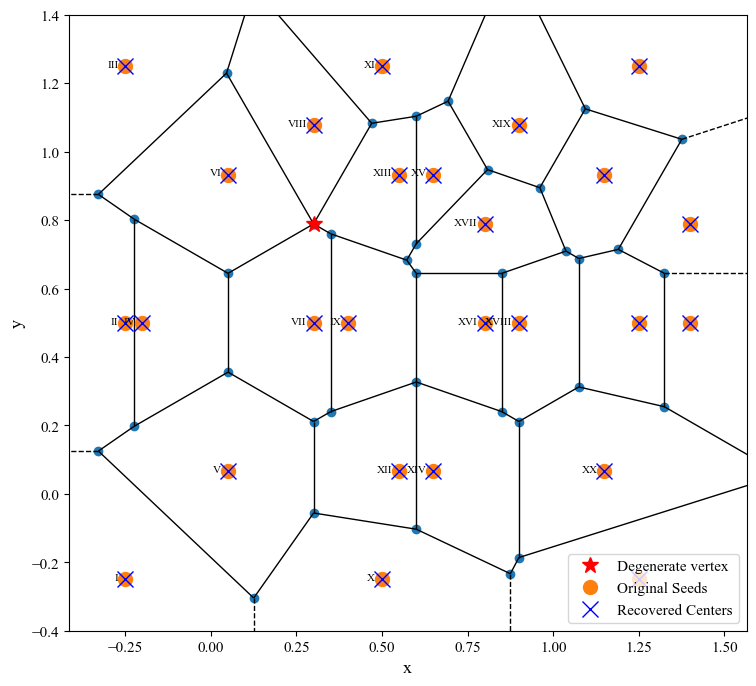

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# ----------------------------------------------------------
# Helper: Robust circumcenter
# ----------------------------------------------------------
def circumcenter(A, B, C, tol=1e-12):
    """Compute circumcenter and radius of a triangle (A,B,C)."""
    A, B, C = map(np.asarray, (A, B, C))
    d = 2.0 * np.cross(B - A, C - A)
    if abs(d) < tol:
        center = (A + B + C) / 3
        R = np.linalg.norm(center - A)
        return center, R
    a2, b2, c2 = map(lambda P: np.dot(P, P), (A, B, C))
    ux = (a2 * (B[1]-C[1]) + b2 * (C[1]-A[1]) + c2 * (A[1]-B[1])) / d
    uy = (a2 * (C[0]-B[0]) + b2 * (A[0]-C[0]) + c2 * (B[0]-A[0])) / d
    center = np.array([ux, uy])
    R = np.linalg.norm(center - A)
    return center, R


# ----------------------------------------------------------
# Build n degenerate cells
# ----------------------------------------------------------
def build_multiple_degenerate_cells(n_cells=3, m=5, radius=0.25,
                                    n_degenerate=4, separation=0.5,
                                    frame_margin=0.25):
    """
    Create a Voronoi diagram with n_cells cells, each having degenerate vertices.

    Parameters
    ----------
    n_cells : int
        Number of degenerate cells to generate.
    m : int
        Number of sides (neighbors) per cell.
    radius : float
        Distance from center to neighbor ring.
    n_degenerate : int
        Number of degenerate vertices per cell.
    separation : float
        Distance between adjacent cell centers.
    frame_margin : float
        Outer frame distance to bound the Voronoi diagram.
    """
    # centers are placed along the x-axis
    centers = [np.array([0.3 + i * separation, 0.5]) for i in range(n_cells)]
    all_points = []

    for O in centers:
        # --- Step 1: Regular ring of neighbors ---
        angles = np.linspace(0, 2 * np.pi, m, endpoint=False)
        neighbors = np.column_stack([
            O[0] + radius * np.cos(angles),
            O[1] + radius * np.sin(angles)
        ])

        # --- Step 2: Create degenerate concyclic points ---
        D_list = []
        for i in range(n_degenerate):
            A, B, C = O, neighbors[i], neighbors[(i + 1) % m]
            center, _ = circumcenter(A, B, C)
            D = 2 * center - A  # diametrically opposite to O
            D_list.append(D)
        if D_list:
            D = np.vstack(D_list)
        else:
            D = np.empty((0, 2))

        all_points.append(O[None, :])
        all_points.append(neighbors)
        all_points.append(D)

    # --- Step 3: Add frame points ---
    f = frame_margin
    frame_pts = np.array([
        [-f, -f], [0.5, -f], [1 + f, -f],
        [-f, 0.5], [1 + f, 0.5],
        [-f, 1 + f], [0.5, 1 + f], [1 + f, 1 + f]
    ])
    all_points.append(frame_pts)

    # --- Step 4: Combine and clean duplicates ---
    points = np.vstack(all_points)
    points = np.unique(np.round(points, 12), axis=0)

    # --- Step 5: Voronoi diagram ---
    vor = Voronoi(points, qhull_options="Qbb Qc Qx Qz")

    return vor, points, centers


# ----------------------------------------------------------
# Run example
# ----------------------------------------------------------
# 🔧 Change n_cells here to create any number of degenerate cells
vor, pts, centers = build_multiple_degenerate_cells(n_cells=2, m=6, radius=0.5, n_degenerate=2, separation=0.6)

# ----------------------------------------------------------
# Plot results
# ----------------------------------------------------------
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 12,
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "lines.linewidth": 1.2
})

fig, ax = plt.subplots(figsize=(9, 8))
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=True, line_colors='k')

from Main_Function import fun_vor_main
explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor,vor.points)

# plot the index of each cell from explicit_voronoi
# for i, items in enumerate(explicit_voronoi):
#     ax.text(cell_centers[i, 0], cell_centers[i, 1], str(i), color='red', fontsize=10, ha='left', va='top')

# plot the index of vertices from vertices
# for idx, vertex in enumerate(vor.vertices):
#     ax.text(vertex[0], vertex[1], str(idx), color='blue', fontsize=12)




# find the vertices in the vertices object that have the same coordinates
total_same_vertices = []
for i in range(len(vertices)):
    coord1 = vertices[i]
    same_vertices = []
    for j in range(len(vor.vertices)):
        coord2 = vor.vertices[j]
        if i != j:
            if np.allclose(coord1, coord2):
                same_vertices.append(j)
    if same_vertices != []:
        same_vertices.append(i)
        
        total_same_vertices.append(same_vertices)
print('total_same_vertices:\n', total_same_vertices)

# delete the similar arrays in total_same_vertices
unique_same_vertices = []
for item in total_same_vertices:
    elem1 = item[0]
    elem2 = item[1]
    if [elem2, elem1] not in unique_same_vertices:
        unique_same_vertices.append(item)
print('unique_same_vertices:\n', unique_same_vertices)

# plot the degenerate vertices
degenerate_coords = np.array([
    vor.vertices[item[0]] for item in unique_same_vertices
])
ax.plot(degenerate_coords[:, 0], degenerate_coords[:, 1],
        'r*', markersize=12, label="Degenerate vertex")
ax.plot(pts[:,0], pts[:,1], 'o', color='tab:orange', ms=10, label="Original Seeds")
ax.plot(cell_centers[:, 0], cell_centers[:, 1], 'bx', ms=12, label="Recovered Centers")

# plot cell number in Roman numbers 
for i, center in enumerate(cell_centers):
    roman_numerals = ["I", "II", "III", "IV", "V", "VI", "VII", "VIII", "IX", "X",
                      "XI", "XII", "XIII", "XIV", "XV", "XVI", "XVII", "XVIII", "XIX", "XX"]
    if i < len(roman_numerals):
        ax.text(center[0]-0.02, center[1]+0.02, roman_numerals[i], color='black', fontsize=8, ha='right', va='top')

ax.legend()
ax.set_aspect('equal')  
ax.set_xlabel("x")
ax.set_ylabel("y")

# save figure
plt.savefig('partially_degenerate_voronoi.png', dpi=600 )




            Converged after 146 iterations
total_same_vertices:
 [[13, 12], [12, 13], [26, 19], [19, 26], [33, 32], [32, 33], [35, 34], [34, 35]]
unique_same_vertices:
 [[13, 12], [26, 19], [33, 32], [35, 34]]


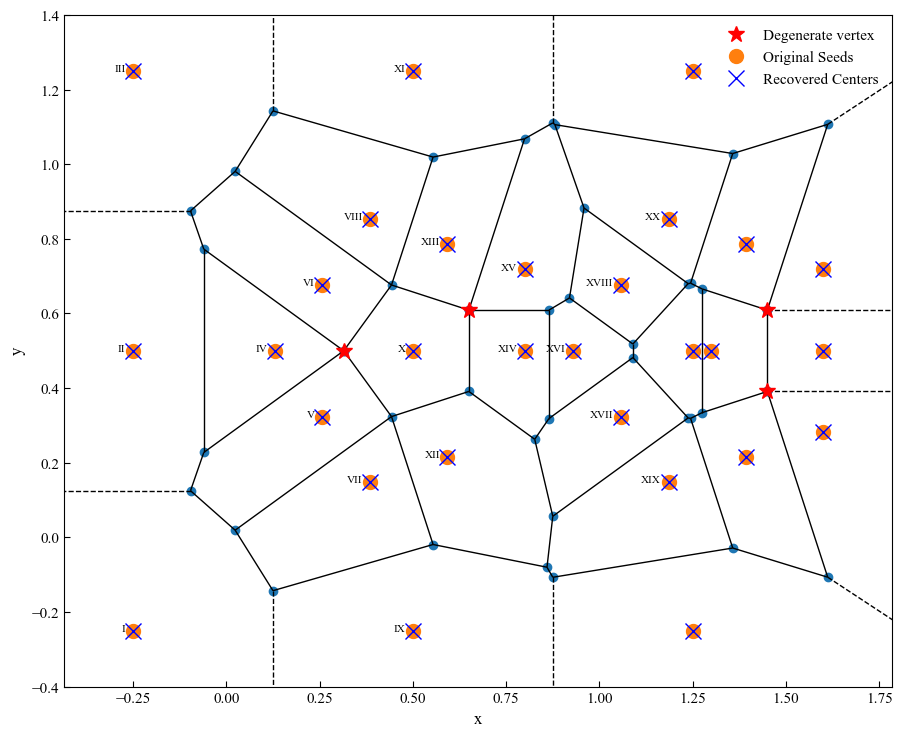

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d


# ----------------------------------------------------------
# Helper: Robust circumcenter
# ----------------------------------------------------------
def circumcenter(A, B, C, tol=1e-12):
    """Compute circumcenter and radius of a triangle (A,B,C)."""
    A, B, C = map(np.asarray, (A, B, C))
    d = 2.0 * np.cross(B - A, C - A)
    if abs(d) < tol:
        center = (A + B + C) / 3
        R = np.linalg.norm(center - A)
        return center, R
    a2, b2, c2 = map(lambda P: np.dot(P, P), (A, B, C))
    ux = (a2 * (B[1]-C[1]) + b2 * (C[1]-A[1]) + c2 * (A[1]-B[1])) / d
    uy = (a2 * (C[0]-B[0]) + b2 * (A[0]-C[0]) + c2 * (B[0]-A[0])) / d
    center = np.array([ux, uy])
    R = np.linalg.norm(center - A)
    return center, R


# ----------------------------------------------------------
# Build multiple cells with independent geometry
# ----------------------------------------------------------
def build_custom_degenerate_cells(
    cell_definitions, radius=0.25, frame_margin=0.25, separation=0.8
):
    """
    Build multiple Voronoi cells with individually specified parameters.

    Parameters
    ----------
    cell_definitions : list of dict
        Each dict defines one cell, e.g.:
        {"m": 5, "n_degenerate": 3}
    radius : float
        Distance from center to neighbor ring.
    frame_margin : float
        Outer frame to bound the diagram.
    separation : float
        Spacing between cells along x-axis.
    """
    all_points = []
    centers = []

    # place cells along x-axis
    for i, cell in enumerate(cell_definitions):
        m = cell["m"]
        n_degenerate = min(cell["n_degenerate"], m)
        center = np.array([0.5 + i * separation, 0.5])
        centers.append(center)

        # --- Step 1: Regular ring of neighbors ---
        angles = np.linspace(0, 2 * np.pi, m, endpoint=False)
        neighbors = np.column_stack([
            center[0] + radius * np.cos(angles),
            center[1] + radius * np.sin(angles)
        ])

        # --- Step 2: Create degenerate concyclic points ---
        D_list = []
        for k in range(n_degenerate):
            A, B, C = center, neighbors[k], neighbors[(k + 1) % m]
            circ, _ = circumcenter(A, B, C)
            D = 2 * circ - A  # diametrically opposite
            D_list.append(D)
        D = np.vstack(D_list) if len(D_list) > 0 else np.empty((0, 2))

        all_points.append(center[None, :])
        all_points.append(neighbors)
        all_points.append(D)

    # --- Step 3: Frame points ---
    f = frame_margin
    frame_pts = np.array([
        [-f, -f], [0.5, -f], [1 + f, -f],
        [-f, 0.5], [1 + f, 0.5],
        [-f, 1 + f], [0.5, 1 + f], [1 + f, 1 + f]
    ])
    all_points.append(frame_pts)

    # --- Step 4: Combine and clean ---
    points = np.vstack(all_points)
    points = np.unique(np.round(points, 12), axis=0)

    vor = Voronoi(points, qhull_options="Qbb Qc Qx Qz")
    return vor, points, centers


# ----------------------------------------------------------
# Run Example
# ----------------------------------------------------------
# 👇 Her hücreyi ayrı ayrı tanımla
# "m" : kenar sayısı
# "n_degenerate" : degenerate olacak kenar sayısı
cell_definitions = [
    {"m": 5, "n_degenerate": 4},  # 5 kenarlı, 3 köşesi degenerate
    {"m": 5, "n_degenerate": 5},  # 6 kenarlı, 5 köşesi degenerate
]

vor, pts, centers = build_custom_degenerate_cells(cell_definitions, radius=0.3, separation=0.8)


plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 11,
    "axes.linewidth": 0.8,
    "axes.labelsize": 12,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "xtick.minor.size": 2,
    "ytick.minor.size": 2,
    "legend.frameon": False,
})

fig, ax = plt.subplots(figsize=(9, 8))
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=True, line_colors='k')
from Main_Function import fun_vor_main
explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor,vor.points)

# plot the index of each cell from explicit_voronoi
# for i, items in enumerate(explicit_voronoi):
#     ax.text(cell_centers[i, 0], cell_centers[i, 1], str(i), color='red', fontsize=10, ha='left', va='top')

# plot the index of vertices from vertices
# for idx, vertex in enumerate(vor.vertices):
#     ax.text(vertex[0], vertex[1], str(idx), color='blue', fontsize=12)




# find the vertices in the vertices object that have the same coordinates
total_same_vertices = []
for i in range(len(vertices)):
    coord1 = vertices[i]
    same_vertices = []
    for j in range(len(vor.vertices)):
        coord2 = vor.vertices[j]
        if i != j:
            if np.allclose(coord1, coord2):
                same_vertices.append(j)
    if same_vertices != []:
        same_vertices.append(i)
        
        total_same_vertices.append(same_vertices)
print('total_same_vertices:\n', total_same_vertices)

# delete the similar arrays in total_same_vertices
unique_same_vertices = []
for item in total_same_vertices:
    elem1 = item[0]
    elem2 = item[1]
    if [elem2, elem1] not in unique_same_vertices:
        unique_same_vertices.append(item)

print('unique_same_vertices:\n', unique_same_vertices)


# plot the degenerate vertices
degenerate_coords = np.array([
    vor.vertices[item[0]] for item in unique_same_vertices
])
ax.plot(degenerate_coords[:, 0], degenerate_coords[:, 1],
        'r*', markersize=12, label="Degenerate vertex")
ax.plot(pts[:,0], pts[:,1], 'o', color='tab:orange', ms=10, label="Original Seeds")
ax.plot(cell_centers[:, 0], cell_centers[:, 1], 'bx', ms=12, label="Recovered Centers")

# plot cell number in Roman numbers 
for i, center in enumerate(cell_centers):
    roman_numerals = ["I", "II", "III", "IV", "V", "VI", "VII", "VIII", "IX", "X",
                      "XI", "XII", "XIII", "XIV", "XV", "XVI", "XVII", "XVIII", "XIX", "XX"]
    if i < len(roman_numerals):
        ax.text(center[0]-0.02, center[1]+0.02, roman_numerals[i], color='black', fontsize=8, ha='right', va='top')

ax.legend()
ax.set_aspect('equal')  
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.tight_layout(pad=0.5)
